# Exploring Cospectral Graphs

Two graphs are **cospectral** if they share the same eigenvalues. This notebook explores cospectral pairs and how different matrices distinguish them.

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=4, suppress=True)

## The Smallest Cospectral Pair

At n=5: $C_4 \cup K_1$ (4-cycle + isolated vertex) and $K_{1,4}$ (star) share the same adjacency spectrum.

In [2]:
# C4 + isolated vertex
G1 = nx.cycle_graph(4)
G1.add_node(4)

# Star graph K_{1,4}
G2 = nx.star_graph(4)

spec1 = np.sort(nx.adjacency_spectrum(G1).real)
spec2 = np.sort(nx.adjacency_spectrum(G2).real)

print("Adjacency eigenvalues:")
print(f"  C4+K1:  {spec1}")
print(f"  K_1,4:  {spec2}")
print(f"  Same spectrum: {np.allclose(spec1, spec2)}")

Adjacency eigenvalues:
  C4+K1:  [-2. -0.  0.  0.  2.]
  K_1,4:  [-2.  0.  0.  0.  2.]
  Same spectrum: True


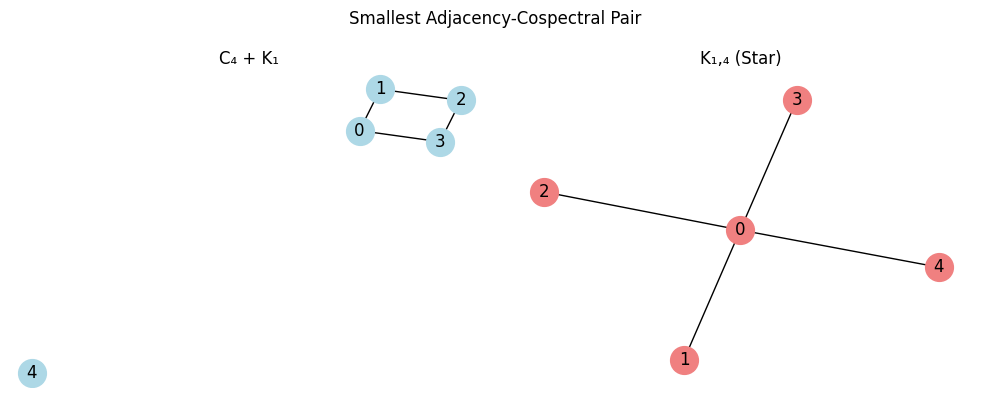

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

nx.draw(G1, ax=axes[0], with_labels=True, node_color='lightblue', node_size=400)
axes[0].set_title('C\u2084 + K\u2081')

nx.draw(G2, ax=axes[1], with_labels=True, node_color='lightcoral', node_size=400)
axes[1].set_title('K\u2081,\u2084 (Star)')

plt.suptitle('Smallest Adjacency-Cospectral Pair', fontsize=12)
plt.tight_layout()
plt.show()

## Can the Laplacian Distinguish Them?

In [4]:
lap1 = np.sort(nx.laplacian_spectrum(G1).real)
lap2 = np.sort(nx.laplacian_spectrum(G2).real)

print("Laplacian eigenvalues:")
print(f"  C4+K1:  {lap1}")
print(f"  K_1,4:  {lap2}")
print(f"\nLaplacian {'CANNOT' if np.allclose(lap1, lap2) else 'CAN'} distinguish them")

Laplacian eigenvalues:
  C4+K1:  [-0.  0.  2.  2.  4.]
  K_1,4:  [0. 1. 1. 1. 5.]

Laplacian CAN distinguish them


## The Non-Backtracking Matrix

The Hashimoto matrix is indexed by directed edges: $B_{e \to f} = 1$ if edge $e$ leads into $f$ without backtracking.

In [5]:
def nb_spectrum(G):
    """Compute non-backtracking eigenvalues."""
    if G.number_of_edges() == 0:
        return np.array([])
    edges = [(u,v) for u,v in G.edges()] + [(v,u) for u,v in G.edges()]
    idx = {e: i for i, e in enumerate(edges)}
    B = np.zeros((len(edges), len(edges)))
    for i, (u, v) in enumerate(edges):
        for w in G.neighbors(v):
            if w != u:
                B[i, idx[(v, w)]] = 1
    return np.linalg.eigvals(B)

nb1 = nb_spectrum(G1)
nb2 = nb_spectrum(G2)

print(f"NB matrix sizes: {2*G1.number_of_edges()}x{2*G1.number_of_edges()} vs {2*G2.number_of_edges()}x{2*G2.number_of_edges()}")
print(f"NB spectral radii: {np.max(np.abs(nb1)):.4f} vs {np.max(np.abs(nb2)):.4f}")

NB matrix sizes: 8x8 vs 8x8
NB spectral radii: 1.0000 vs 0.0000


## Counting Cospectral Pairs (n=6)

Let's see how often each matrix type fails to distinguish non-isomorphic graphs.

In [6]:
from itertools import combinations
from networkx.generators.atlas import graph_atlas_g

graphs_6 = [G for G in graph_atlas_g() 
            if G.number_of_nodes() == 6 and nx.is_connected(G)]
print(f"Connected graphs on 6 vertices: {len(graphs_6)}")

adj_spec = [np.sort(nx.adjacency_spectrum(G).real) for G in graphs_6]
lap_spec = [np.sort(nx.laplacian_spectrum(G).real) for G in graphs_6]
nb_spec = [nb_spectrum(G) for G in graphs_6]

adj_cospec = lap_cospec = nb_cospec = 0
for i, j in combinations(range(len(graphs_6)), 2):
    if not nx.is_isomorphic(graphs_6[i], graphs_6[j]):
        if np.allclose(adj_spec[i], adj_spec[j]): 
            adj_cospec += 1
        if np.allclose(lap_spec[i], lap_spec[j]): 
            lap_cospec += 1
        # NB spectra only comparable if same edge count
        if len(nb_spec[i]) == len(nb_spec[j]):
            if np.allclose(np.sort(np.abs(nb_spec[i])), np.sort(np.abs(nb_spec[j]))):
                nb_cospec += 1

print(f"\nCospectral pairs: Adj={adj_cospec}, Lap={lap_cospec}, NB={nb_cospec}")

Connected graphs on 6 vertices: 112



Cospectral pairs: Adj=1, Lap=2, NB=83
